# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=500)

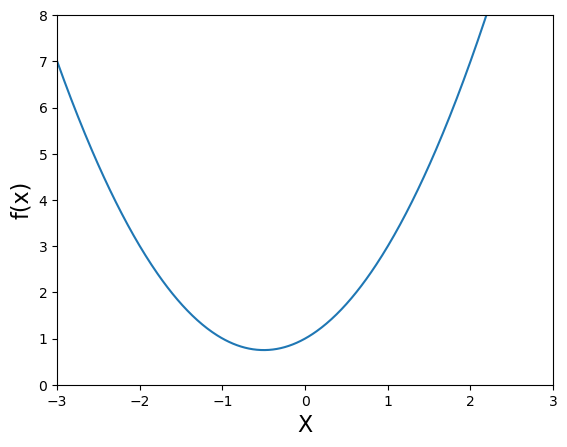

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1));

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

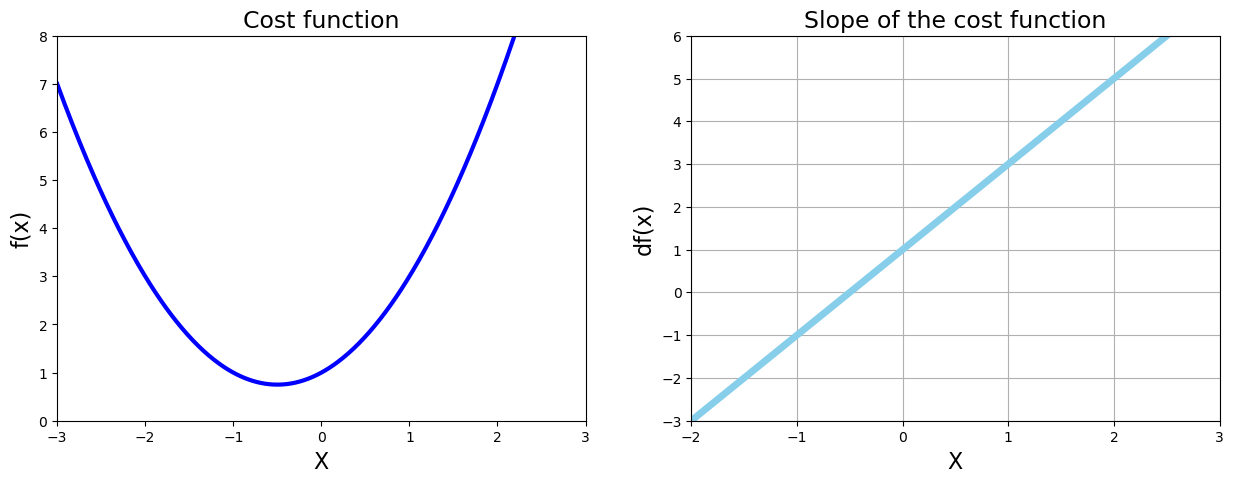

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5);

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello World', n)
print("End of loop")

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [8]:
# Python while loop
counter = 1
while counter < 8:
    print('Counting...', counter)
    counter = counter + 1

Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Counting... 7


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop ran this many times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


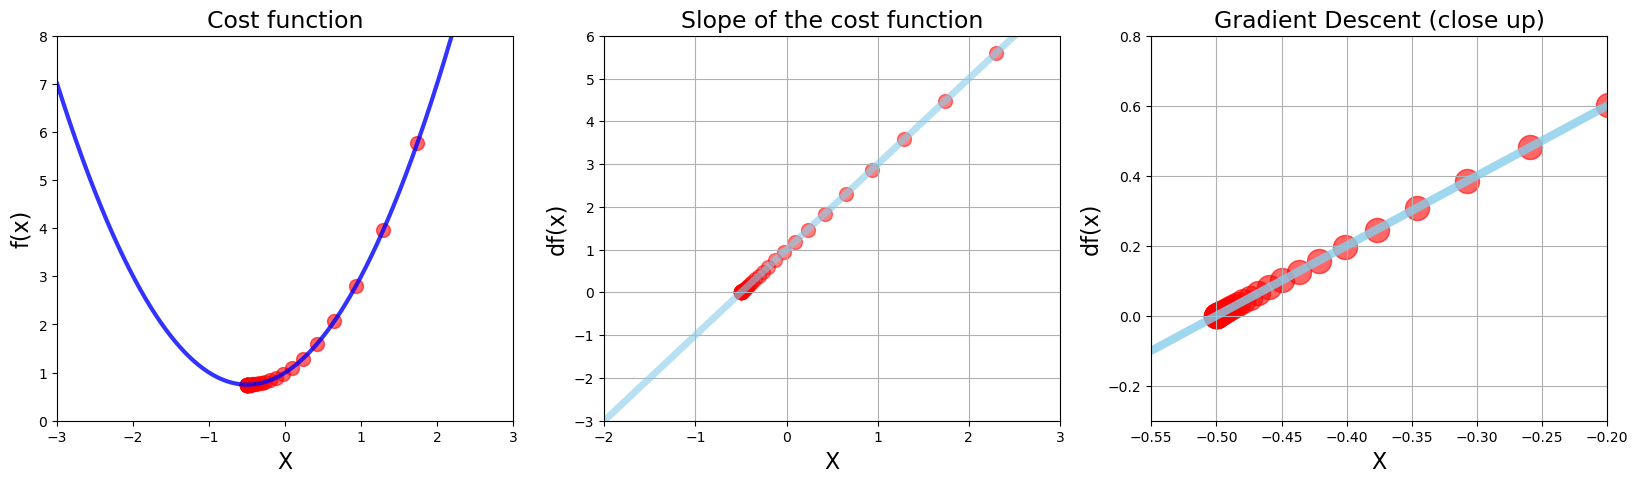

In [10]:
# Superimpose the gradient descent calculation on plot

plt.figure(figsize=[20,5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,3,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5);

#3 Chart: Derivative (Close Up)
plt.subplot(1,3,3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6);

# Example 2 - Multiple Minima va Initial Guess and Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [18]:
# Make Data
x_2 = np.linspace(start=-2,stop=2,num=1000)

In [14]:
def g(x):
    return x**4-4*x**2+5

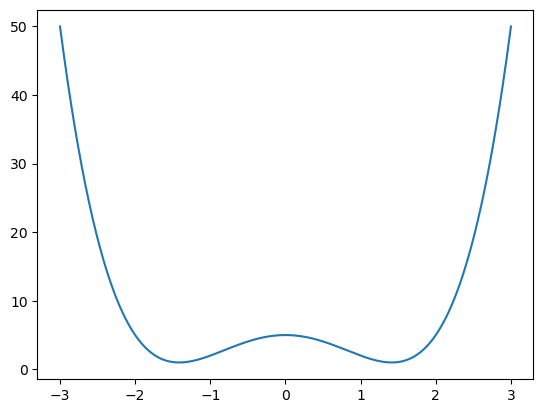

In [19]:
plt.plot(x_1, g(x_1));

In [22]:
def dg(x):
    return 4*x**3 - 8*x

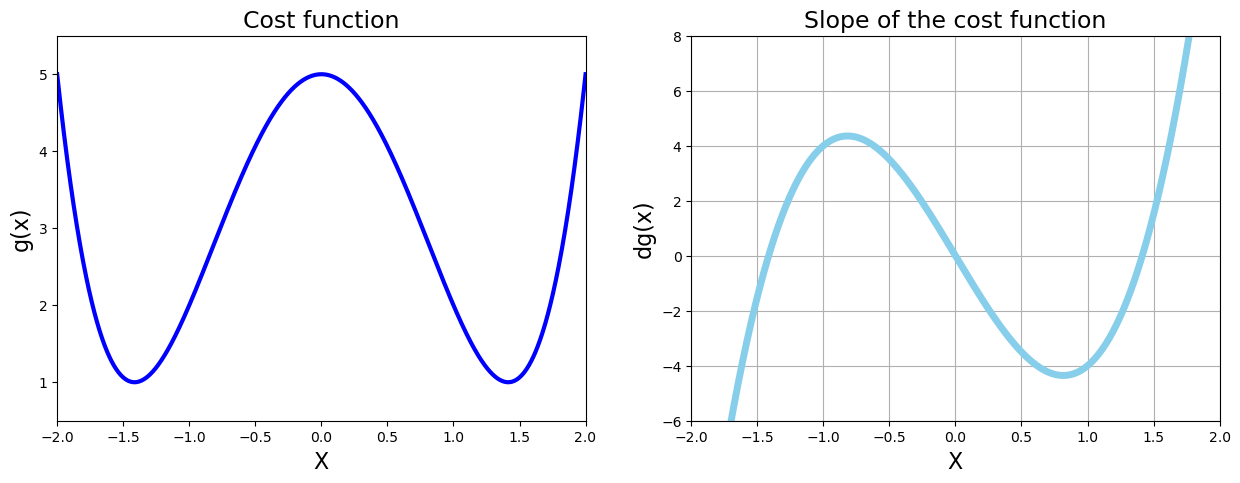

In [27]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5);

## Gradient Descent as a Python Function

In [33]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [49]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [36]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [35]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


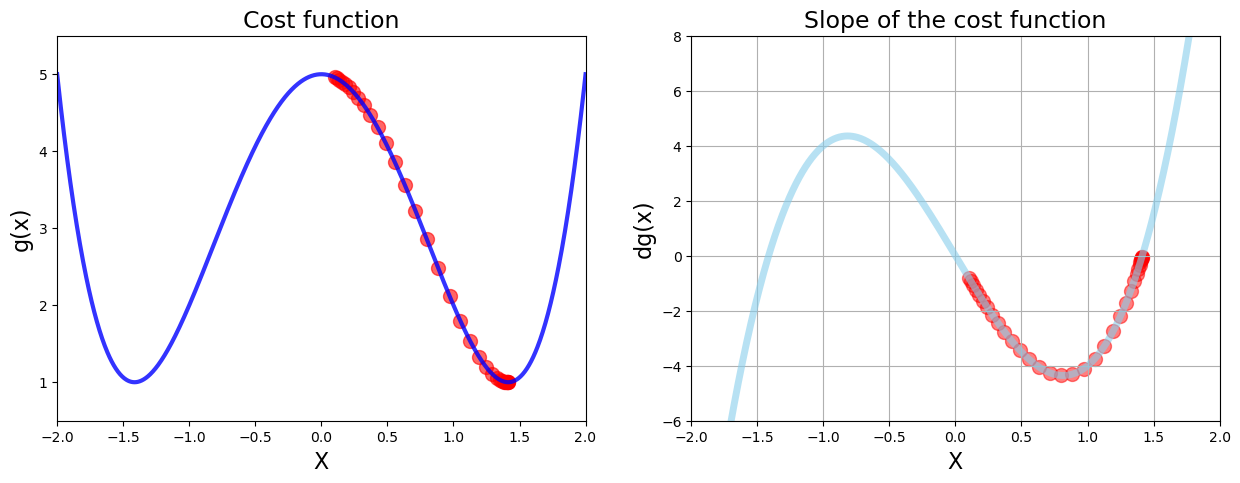

In [47]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5, alpha=0.6);
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.5);